In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
crime_df = pd.read_csv("crime_data.csv")
crime_df

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24
5,603,260,25,68,8,32,15
6,484,325,34,68,12,24,14
7,546,102,33,62,13,28,11
8,424,38,36,69,7,25,12
9,548,226,31,66,9,58,15


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
crime_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [6]:
from sklearn.linear_model import LinearRegression

crime_df = crime_df[['X5','X1']]
#x is what we are using to predict y

X = np.array(crime_df['X5']).reshape(-1,1)

# y is what we are predicting
y = np.array(crime_df['X1']).reshape(-1,1)

#1. train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#2. Create the model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [8]:
#3. predict new values
y_pred = regression_model.predict(X_test)
y_pred

array([[657.03984654],
       [683.63091813],
       [763.40413288],
       [816.58627605],
       [603.85770337],
       [803.29074026],
       [763.40413288],
       [630.44877496],
       [763.40413288],
       [710.22198971],
       [630.44877496],
       [630.44877496],
       [696.92645392],
       [603.85770337],
       [657.03984654]])

In [9]:
# r squared
accuracy_score = regression_model.score(X_test, y_test)
print(accuracy_score)

0.1324540151385344


In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1324540151385344

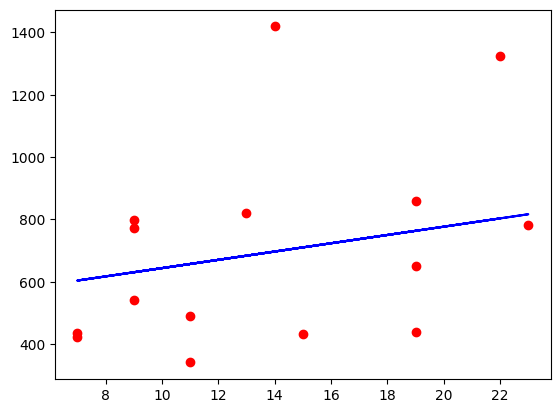

In [11]:
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test, y_pred, color = 'b')

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))

[0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]
<class 'numpy.ndarray'>


In [16]:
print(knn.score(X_test, y_test))

0.7142857142857143


In [ ]:
diabetes_pred_df = pd.DataFrame(X_test, columns = diabetes_df.columns[0:8])
diabetes_pred_df['Actual Outcome'] = y_test.tolist()
diabetes_pred_df['Predicted Outcome'] = p_pred.tolist()